# Introduction

This week we are going to look at a few more complex packages for doing statistics and machine learning in Python. One of the key packages for scientific work in python is called scipy (normally abbreviated sp), which provides a wide variety of functions for doing common technical work, including statistical methods. On the machine learning side, the scikitlearn package (abbreviated skl) provides relatively efficient implementations of many methods for analyzing datasets. For both of these packages, the syntax within families of methods is reasonably consistent, so we will explore one example each to provide an overview of the main interaction styles. For scipy, we will work with the scipy.stats package and fitting normal distributions, while for scikitlearn we will look at some examples of linear regression. Both of these settings are also nice introductions to the object-oriented perspective in python programming. 

The reading for this week is: 
* [Chapter 5 of the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html)
* The .pdf in this folder gives additional examples of the scipy.stats syntax


Very early on in this module we looked at the random package for generating uniform random number on an interval but for many real-world applications we need more complex distributions. One of the most common distributions for modeling is the normal (or gaussian) distribution, which forms the bell-curve shape seen in many distributions. 

In [7]:
from scipy.stats import norm, probplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
my_normal = norm(loc=-1,scale=3)
my_other_norm = norm(100,scale=100)

In [13]:
draws = my_normal.rvs(size=[50000,1])

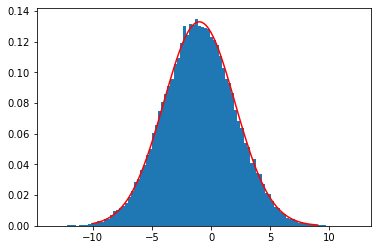

In [14]:
plt.hist(draws,density=True,bins=100)
plt.plot(np.linspace(-10,9,100),my_normal.pdf(np.linspace(-10,9,100)),'r-')

In [15]:
draws.mean()

-1.0257212423269917

In [16]:
draws.std()

3.0094887617755566

In [17]:
my_normal.pdf(-4)

0.08065690817304778

In [18]:
my_normal.ppf(.05)

-5.934560880854418

In [19]:
my_normal.ppf(.5)

-1.0

In [10]:
my_normal.ppf(.99)


5.979043622122522

In [20]:
my_normal.cdf(-2)

0.36944134018176367

In [12]:
my_normal.cdf(2)

0.8413447460685429

In [13]:
my_normal.cdf(2) - my_normal.cdf(-2)

0.47190340588677926

In [14]:
1 - my_normal.cdf(2)

0.15865525393145707

((array([-4.19138481, -3.98563638, -3.8734641 , ...,  3.8734641 ,
          3.98563638,  4.19138481]),
  array([-13.46986601, -12.6331111 , -12.07286233, ...,  11.05827469,
          11.45546842,  12.25567188])),
 (3.0096980755075773, -1.0257212423269928, 0.9999867154002055))

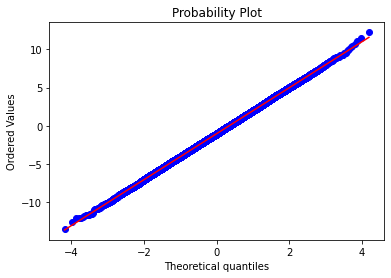

In [21]:
probplot(draws[:,0],plot=plt)


In [22]:
HWAS = pd.read_csv("../Week5_Pandas/Height_Weight_Age_Sex.csv")

In [23]:
HWAS['height'].mean()

138.26359632352944

In [24]:
HWAS['height'].std()

27.602447640564698

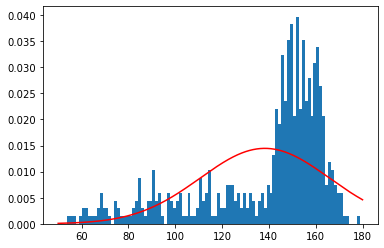

In [25]:
height_norm = norm(loc=138.2635963235294,scale=27.602447640564694)
plt.hist(HWAS['height'],density=True,bins=100)
plt.plot(np.linspace(50,180,2000),height_norm.pdf(np.linspace(50,180,2000)),'r-')


((array([-3.01773531e+00, -2.73799433e+00, -2.58085770e+00, -2.46951789e+00,
         -2.38232877e+00, -2.31019183e+00, -2.24838671e+00, -2.19413721e+00,
         -2.14566704e+00, -2.10176852e+00, -2.06158185e+00, -2.02447240e+00,
         -1.98995789e+00, -1.95766291e+00, -1.92728931e+00, -1.89859618e+00,
         -1.87138601e+00, -1.84549475e+00, -1.82078459e+00, -1.79713864e+00,
         -1.77445682e+00, -1.75265279e+00, -1.73165151e+00, -1.71138733e+00,
         -1.69180248e+00, -1.67284585e+00, -1.65447198e+00, -1.63664027e+00,
         -1.61931427e+00, -1.60246117e+00, -1.58605130e+00, -1.57005774e+00,
         -1.55445600e+00, -1.53922371e+00, -1.52434042e+00, -1.50978732e+00,
         -1.49554714e+00, -1.48160393e+00, -1.46794296e+00, -1.45455057e+00,
         -1.44141410e+00, -1.42852177e+00, -1.41586259e+00, -1.40342633e+00,
         -1.39120342e+00, -1.37918489e+00, -1.36736234e+00, -1.35572788e+00,
         -1.34427409e+00, -1.33299398e+00, -1.32188099e+00, -1.31092889e+00,

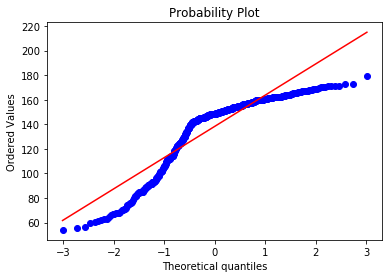

In [57]:
probplot(HWAS["height"],plot=plt)


In [35]:
HWAS_Adult = HWAS.loc[(HWAS["age"]>25)]

In [52]:
HWAS_Adult['height'].mean()

154.6914615916955

In [53]:
HWAS_Adult['height'].std()

7.67367674640238

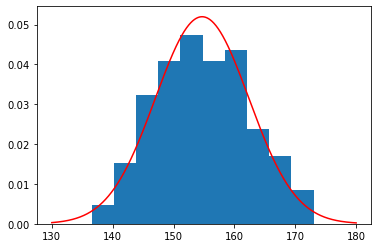

In [56]:
height_norm = norm(loc=154.6914615916955,scale=7.67367674640238)
plt.hist(HWAS_Adult['height'],density=True)
plt.plot(np.linspace(130,180,2000),height_norm.pdf(np.linspace(130,180,2000)),'r-')


((array([-2.82075228, -2.52320945, -2.35464121, -2.23446819, -2.13988614,
         -2.06128713, -1.99367721, -1.9341147 , -1.88071489, -1.83219483,
         -1.78764014, -1.74637523, -1.70788622, -1.67177275, -1.63771659,
         -1.60546043, -1.57479314, -1.54553923, -1.51755122, -1.49070387,
         -1.46488995, -1.44001686, -1.41600406, -1.39278108, -1.37028585,
         -1.34846343, -1.32726493, -1.30664665, -1.28656935, -1.26699768,
         -1.24789966, -1.22924626, -1.21101103, -1.19316985, -1.17570058,
         -1.15858292, -1.14179818, -1.12532909, -1.10915971, -1.09327523,
         -1.07766191, -1.06230698, -1.0471985 , -1.03232537, -1.01767716,
         -1.00324412, -0.98901709, -0.97498749, -0.96114722, -0.94748865,
         -0.9340046 , -0.92068826, -0.90753321, -0.89453338, -0.88168298,
         -0.86897656, -0.85640891, -0.84397509, -0.83167041, -0.81949037,
         -0.80743071, -0.79548735, -0.7836564 , -0.77193413, -0.760317  ,
         -0.74880157, -0.7373846 , -0.

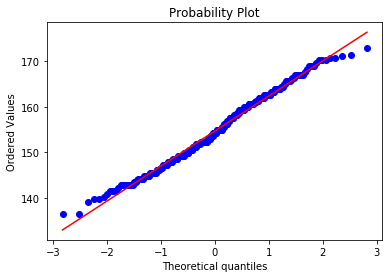

In [59]:
probplot(HWAS_Adult['height'],plot=plt)

(Linear) Regression is a statistical technique that attempts to model the (linear) relationship between a pair of variables. One of the most common versions of this process is called ordinary least squares regression. We can use this technique to make predictions based on a line of best fit to our data. 

In [26]:
from sklearn.linear_model import LinearRegression


In [27]:
df = pd.read_csv("./Data/education_income.csv")

In [28]:
df.head()


,State,HS Perc,HS Rank,BS Perc,BS rank,ADV Perc,Per Capita Income,Median HH Income,Median Family Income,Population,Num HH,Num Family,2018,2017,2016,2015,2014
0,Alabama,85.3,45,24.5,46,9.1,23606,42830,53764,4849377,1841217,1232515,49861,48123,46257,44765,42830
1,Alaska,92.4,5,29.0,28,10.4,33062,71583,82307,736732,249659,165015,74346,73181,76440,73355,71583
2,Arizona,86.5,39,28.4,32,10.7,25715,50068,59700,6731484,2428743,1579481,59246,56581,53558,51492,50068
3,Arkansas,85.6,44,22.0,50,7.9,22883,41262,51528,2966369,1131288,752212,47062,45869,44334,41995,41262
4,California,82.5,51,32.6,15,12.2,30441,61933,71015,38802500,12758648,8762059,75277,71805,67739,64500,61933


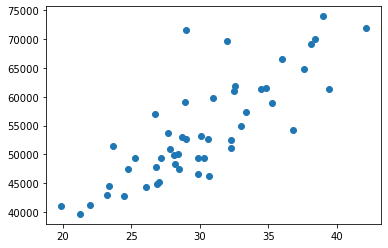

In [29]:
plt.scatter(df["BS Perc"],df["Median HH Income"])

In [30]:
OLS = LinearRegression()
OLS.fit(df[['BS Perc']],df['Median HH Income'])
yhat = OLS.predict(df[['BS Perc']])

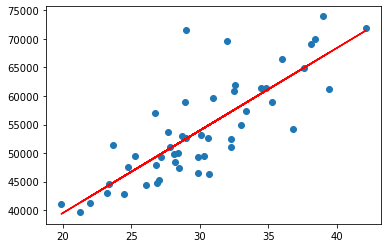

In [31]:
plt.scatter(df[['BS Perc']],df['Median HH Income'])
plt.plot(df[['BS Perc']],yhat,color='red')

In [70]:
OLS.coef_

array([1446.42891887])

In [72]:
OLS.intercept_

10551.95953721791

In [73]:
OLS.score(df[['BS Perc']],df['Median HH Income'])

0.6625817676834422

In [76]:
OLS.predict([[40]])

array([68409.11629193])

In [77]:
40*1446.42891887 + 10551.95953721791

68409.11629201792

In [36]:
HW_OLS = LinearRegression()
HW_OLS.fit(HWAS_Adult[["height"]],HWAS_Adult["weight"])
yhat = HW_OLS.predict(HWAS_Adult[['height']])

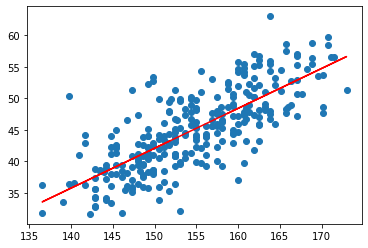

In [37]:
plt.scatter(HWAS_Adult[["height"]],HWAS_Adult["weight"])
plt.plot(HWAS_Adult[["height"]],yhat,color='red')

In [38]:
HW_OLS.coef_

array([0.63149399])